In [4]:
import statistics
import numpy as np
from google.colab import files 
import io
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

upload = files.upload()


Saving players.csv to players (1).csv


In [6]:
df = pd.read_csv(io.BytesIO(upload['players.csv'])) 
print(df.head())

           player  salary  rating  teams
0  Arnoldo Harvey     125       1   blue
1   Petra Michael     155       1  green
2   Tammie Porter     323       2   blue
3  Socorro Tucker     272       2   blue
4   Elroy Murillo     157       2   blue


count     20.000000
mean     530.550000
std      276.579574
min      125.000000
25%      315.250000
50%      441.000000
75%      800.000000
max      966.000000
Name: salary, dtype: float64


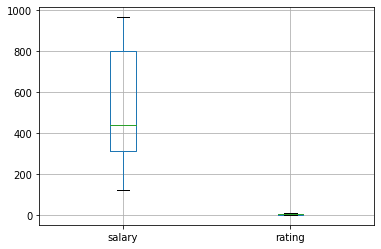

In [8]:
# draw box plot 
boxplot = df.boxplot()
print(df['salary'].describe())
# box plot for rating is very narrow because scale is different from salary and rating. 
# Point: better to run separatly

count     20.000000
mean     530.550000
std      276.579574
min      125.000000
25%      315.250000
50%      441.000000
75%      800.000000
max      966.000000
Name: salary, dtype: float64


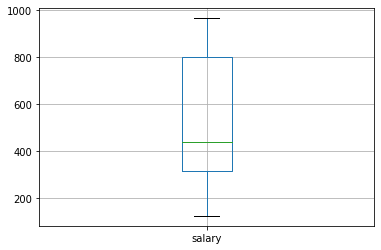

In [9]:
boxplot = df.boxplot(column=['salary'])
print(df['salary'].describe())

count    20.000000
mean      4.950000
std       2.762055
min       1.000000
25%       2.750000
50%       4.000000
75%       7.000000
max      10.000000
Name: rating, dtype: float64


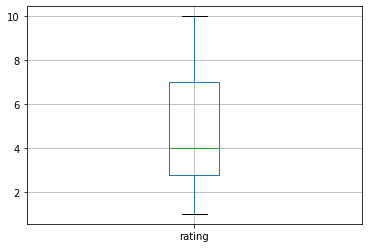

In [10]:
boxplot = df.boxplot(column=['rating'])
print(df['rating'].describe())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f401530b490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f401530bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4015301f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4015311a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4015301490>],
 'means': [<matplotlib.lines.Line2D at 0x7f4015311f50>]}

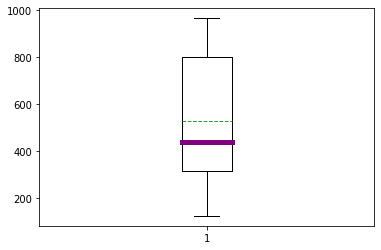

In [12]:
# drawing the same graph matplot
# matplot can custmize color and width of each statstical lines in box plot 
import matplotlib.pyplot as plt
x = df['salary']

fig, ax = plt.subplots()
ax.boxplot(x, showmeans=True,meanline=True, medianprops = {'linewidth': 5, 'color':'purple'})
plt.show()

# Correlation

In [13]:

# correlation 
column_1 = df['salary']
column_2 = df['rating']

correlation = column_1.corr(column_2)
print('correlation')
print(correlation)
print(df.corr())

correlation
0.9612748378992164
          salary    rating
salary  1.000000  0.961275
rating  0.961275  1.000000


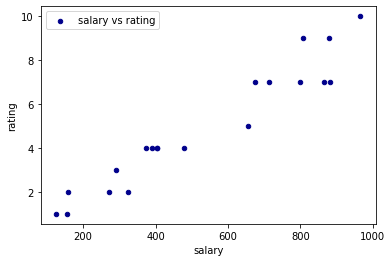

In [16]:
ax = df.plot.scatter(x='salary', y='rating', color='DarkBlue', label='salary vs rating')

4     5
7     5
2     3
1     2
9     2
3     1
5     1
10    1
Name: rating, dtype: int64


Text(0.5, 0, 'number of instances')

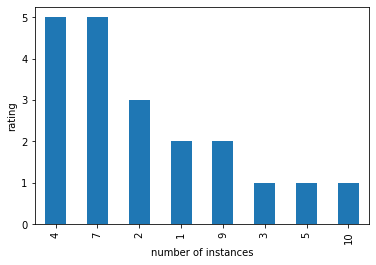

In [27]:
# bar graph 
rating_count = df['rating'].value_counts()
print(rating_count)

rating_count.plot.bar() #vertical bar graph
plt.ylabel('rating')
plt.xlabel('number of instances')

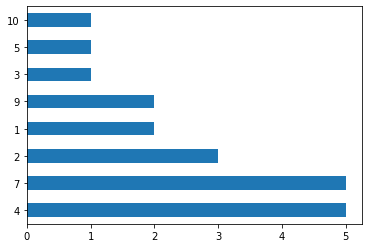

In [24]:
#horizontal bar graph
rating_count.plot.barh()

Text(0.5, 1.0, 'team representation')

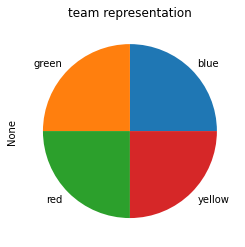

In [31]:
# making pie chart
df.groupby('teams').size().plot(kind='pie')
plt.title('team representation')

# Real World Data

      id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  25428    Lovely apt in City Centre (w.lift) near Jordaan    56142   
3  27886  Romantic, stylish B&B houseboat in canal district    97647   
4  28871                            Comfortable double room   124245   

   host_name  neighbourhood_group                           neighbourhood  \
0     Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1  Alexander                  NaN                            Centrum-Oost   
2       Joan                  NaN                            Centrum-West   
3       Flip                  NaN                            Centrum-West   
4      Edwin                  NaN                            Centrum-Oost   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.36575    4.94142     Private roo

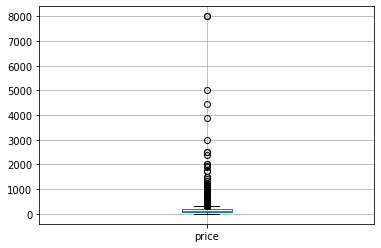

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

listings = pd.read_csv('/content/listings.csv')
print(listings.head())

# discribe price columns
print(listings['price'].describe())
#show result in boxplot 
print(listings.boxplot('price'))



In [7]:
# corrlations
print(listings[['minimum_nights', 'number_of_reviews','reviews_per_month']].corrwith(listings['price']))
print(listings[['number_of_reviews','price','reviews_per_month']].corrwith(listings['minimum_nights']))

minimum_nights       0.049182
number_of_reviews   -0.083182
reviews_per_month   -0.106022
dtype: float64
number_of_reviews   -0.017005
price                0.049182
reviews_per_month   -0.025436
dtype: float64


Text(0.5, 1.0, 'room type')

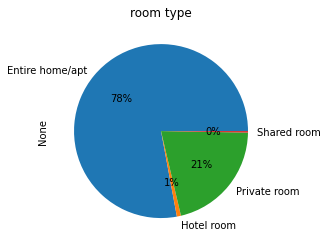

In [10]:
#break down by groups 
listings.groupby('room_type').size().plot(kind='pie', autopct='%1.0f%%')
plt.title('room type')

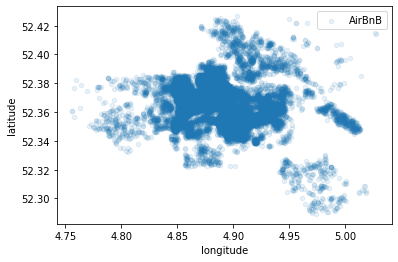

In [15]:
# plot longitude and latitude
listings.plot.scatter(y='latitude', x='longitude', alpha=0.1, label='AirBnB')